# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1. This question provides some practice cleaning variables which have common problems.**

**1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)**


In [1]:
import pandas as pd
df = pd.read_csv('airbnb_hw.csv',low_memory=False)

df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

missing_values = df['Price'].isna().sum()
df['Price'].describe(), missing_values

(count    30478.000000
 mean       163.589737
 std        197.785454
 min         10.000000
 25%         80.000000
 50%        125.000000
 75%        195.000000
 max      10000.000000
 Name: Price, dtype: float64,
 0)

To clean the Price variable I removed commas, converted to numeric, and checked for missing values. I end up with zero missing values.

**2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?**

In [2]:
df = pd.read_csv('mn_police_use_of_force.csv',low_memory=False)
initial_missing = df['subject_injury'].isna().sum()
df['subject_injury'] = df['subject_injury'].apply(lambda x: 'Yes' if pd.notna(x) else 'No')
final_missing = df['subject_injury'].isna().sum()
missing_proportion = initial_missing / len(df)
display(pd.crosstab(df['subject_injury'], df['force_type']))

initial_missing, final_missing, missing_proportion

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,2,7051,1421,0,27,74,87,0,170,31,985
Yes,2,2379,172,2,77,74,0,3,0,46,322


(9848, 0, 0.7619342359767892)

There was a 76.19% proportion of missing values. This is a concern because it suggests a potential recording bias. It could indicate that injuries were underreported or that documentation practices varied. Based on the cross-tabulation, physical force methods like bodily force or taser tend to have high missing values, which suggests that injuries might be underreported for these cases.
Less lethal methods and firearms have stricter documentation, leading to fewer missing values.

**3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.**



In [5]:
import numpy as np
df = pd.read_csv('pretrial_data.csv',low_memory=False)

column_name = "WhetherDefendantWasReleasedPretrial"

df[column_name] = df.get(column_name, pd.Series(np.nan, index=df.index)).replace(["", " "], np.nan)
df[[column_name]].head()

,WhetherDefendantWasReleasedPretrial
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


**4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)**

In [6]:
sentence_column = "ImposedSentenceAllChargeInContactEvent"
reference_column = "SentenceTypeAllChargesAtConvictionInContactEvent"

df[sentence_column] = df[sentence_column].replace(["", " "], np.nan)

df[sentence_column] = pd.to_numeric(df[sentence_column], errors='coerce')

print(df[sentence_column].describe())
print(df[sentence_column].head())

count    13933.000000
mean        19.899671
std         63.571627
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max       2208.000000
Name: ImposedSentenceAllChargeInContactEvent, dtype: float64
0          NaN
1    60.000000
2    12.000000
3     0.985626
4          NaN
Name: ImposedSentenceAllChargeInContactEvent, dtype: float64


I cleaned the "ImposedSentenceAllChargeInContactEvent" column by replacing empty values with NaN, converting strings to numeric, error coercion, and handling decimal values.

**Q2. Go to https://sharkattackfile.net/ and download their dataset on shark attacks.**

**1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.**

In [12]:
import pandas as pd

file_path = "GSAF5.xls"
df_shark_attacks = pd.read_excel(file_path)

display(df.head())

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Peppino Fappani,M,69,...,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Gianluca Di Gioia,M,48,...,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**2. Drop any columns that do not contain data.**

In [14]:
df_shark_attacks.dropna(axis=1, how='all', inplace=True)
display(df_shark_attacks.head())


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Peppino Fappani,M,69,...,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Gianluca Di Gioia,M,48,...,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?**

In [17]:
df_shark_attacks['Year'] = pd.to_numeric(df_shark_attacks['Year'], errors='coerce')

print("Range of 'Year' values:")
print(df_shark_attacks['Year'].describe())

df_since_1940 = df_shark_attacks[df_shark_attacks['Year'] >= 1940]
yearly_attacks = df_since_1940.groupby('Year').size()

first_year = yearly_attacks.index.min()
last_year = yearly_attacks.index.max()

first_count = yearly_attacks.iloc[0]
last_count = yearly_attacks.iloc[-1]

trend = 'increasing' if last_count > first_count else 'decreasing' if last_count < first_count else 'constant'

print(f"\nAttacks between {first_year} and {last_year} are {trend}.")

Range of 'Year' values:
count    6988.000000
mean     1934.992845
std       272.117473
min         0.000000
25%      1947.000000
50%      1985.500000
75%      2009.000000
max      2026.000000
Name: Year, dtype: float64

Attacks between 1940.0 and 2026.0 are decreasing.


The range of value for year are from 0 to 2026. Since 1940, attacks are decreasing.

**4. Clean the Age variable and make a histogram of the ages of the victims.**

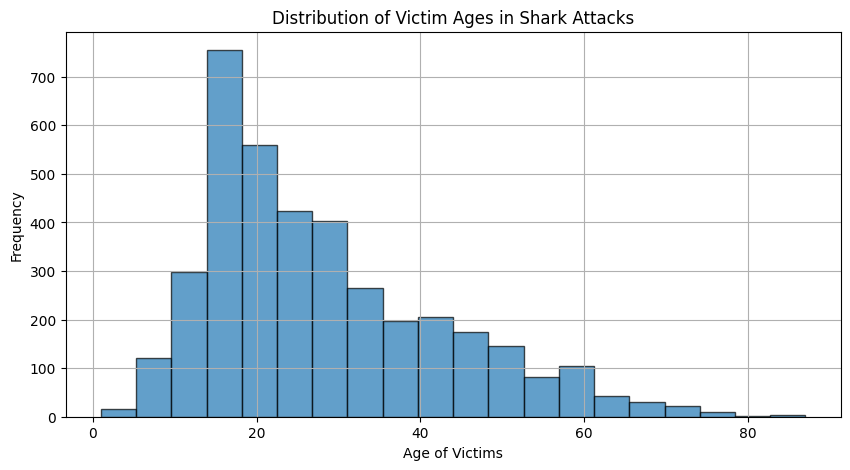

In [18]:
import matplotlib.pyplot as plt

df_shark_attacks_cleaned = df_shark_attacks.dropna(axis=1, how='all')
df_shark_attacks_cleaned['Age'] = pd.to_numeric(df_shark_attacks_cleaned['Age'], errors='coerce')
df_shark_attacks_cleaned = df_shark_attacks_cleaned.dropna(subset=['Age'])

plt.figure(figsize=(10, 5))
plt.hist(df_shark_attacks_cleaned['Age'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Age of Victims")
plt.ylabel("Frequency")
plt.title("Distribution of Victim Ages in Shark Attacks")
plt.grid(True)
plt.show()

**5. What proportion of victims are male?**

In [19]:
df_shark_attacks_cleaned['Sex'] = df_shark_attacks_cleaned['Sex'].astype(str).str.strip().str.upper()
male_count = df_shark_attacks_cleaned[df_shark_attacks_cleaned['Sex'] == 'M'].shape[0]
known_sex_count = df_shark_attacks_cleaned[df_shark_attacks_cleaned['Sex'].isin(['M', 'F'])].shape[0]
proportion_male = male_count / known_sex_count if known_sex_count > 0 else 0
proportion_male

0.8528104575163399

**6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?**

In [22]:
df_shark_attacks['Type'] = df_shark_attacks['Type'].str.strip().str.lower()

def categorize_type(attack_type):
    if 'unprovoked' in str(attack_type):
        return 'Unprovoked'
    elif 'provoked' in str(attack_type):
        return 'Provoked'
    else:
        return 'Unknown'

df_shark_attacks['Type'] = df_shark_attacks['Type'].apply(categorize_type)

unprovoked_attacks = df_shark_attacks[df_shark_attacks['Type'] == 'Unprovoked'].shape[0]
total_attacks = df_shark_attacks.shape[0]
proportion_unprovoked = unprovoked_attacks / total_attacks if total_attacks > 0 else 0
proportion_unprovoked


0.7369098712446351

**7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.**

In [26]:
df_shark_attacks['Fatal Y/N'] = df_shark_attacks['Fatal Y/N'].str.strip().str.upper()

def categorize_fatal(fatal_status):
    if fatal_status == 'Y':
        return 'Y'
    elif fatal_status == 'N':
        return 'N'
    else:
        return 'Unknown'

df_shark_attacks['Fatal Y/N'] = df_shark_attacks['Fatal Y/N'].apply(categorize_fatal)

print(df_shark_attacks['Fatal Y/N'].unique())


['N' 'Y' 'Unknown']


**8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?**

Sharks are more likely to launch unprovoked attacks on men. The attack is more likely to be fatal when it is unprovoked. The attack is more fatal when the victim is male as compared to female. Personally, I would not go near sharks since I think they are dangerous and unpredictable.

**9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)**

In [27]:
df['Species '] = df['Species '].astype(str)
df['Species '] = df['Species '].str.lower()

white_shark_attacks = df['Species '].str.contains('white', na=False).sum()
total_attacks = len(df)
white_shark_proportion = (white_shark_attacks / total_attacks) * 100

white_shark_proportion

10.672389127324749

**Q3. Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.**
  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. The paper focuses on the process of data tidying, a crucial but often overlooked aspect of data cleaning. It introduces the concept of "tidy data," where each variable is a column, each observation is a row, and each observational unit is a table, making data analysis easier and more efficient.
2. The tidy data standard aims to provide a consistent structure that simplifies initial data exploration and analysis. It ensures compatibility between tools by eliminating the need for frequent data restructuring, thus reducing time spent on data wrangling.
3. The first sentence means that tidy datasets follow a predictable structure, while messy datasets vary widely in their disorganization. The second sentence describes the ambiguity in defining variables and observations, as their meaning can change depending on the dataset's context and structure.
4. Values are individual data points, typically numbers or text. Variables contain values that measure the same attribute across different units. Observations contain all values collected on the same unit across multiple variables.
5. Tidy data is structured so that each variable is a column, each observation is a row, each type of observational unit is in its own table.
6. The 5 most common problems are that column headers are values instead of variable names, multiple variables are stored in one column, variables are stored in both rows and columns, multiple types of observational units are stored in the same table, and a single observational unit is spread across multiple tables. Table 4 is messy because income categories are stored as column headers rather than as values in a single variable column. "Melting" a dataset refers to transforming wide-format data into a long format by converting column headers into values in a new variable column.
7. Table 11 is messy because it stores variables in both rows and columns, making it difficult to analyze. Table 12 is tidy because it transforms temperature readings into a single variable column, ensuring each row represents a single observation.
8. The "chicken-and-egg" problem is that tidy data is only as useful as the tools that work with it, but tidy tools depend on the existence of tidy data, making it difficult to transition to better workflows. Wickham hopes that further research will lead to improved frameworks and tools to refine data organization and analysis technique.